In [1]:
import pandas as pd
import numpy as np
from shapely.wkt import loads

In [2]:
deviceid = pd.read_csv('../data/device-to-block-map.csv')
deviceid

,Unnamed: 0,device_id,geoid10
0,0,e01c,170313501001010
1,1,40d7,170317402002002
2,2,05f0,170318398002014
3,3,98ab,170311403011000
4,4,1185,170310204002009
...,...,...,...
93,97,71c4,170318309002016
94,98,a3d5,170312211001016
95,99,0b6f,170312206011003
96,100,4a4d,170312206012001


In [4]:
import geopandas as gpd
censusblock = gpd.read_file('../data/CensusBlockTIGER2010.csv')

censusblock.geometry = censusblock['the_geom'].apply(loads)
# censusblock_geo = gpd.GeoDataFrame(data=censusblock, geometry=censusblock['the_geom'])

In [5]:
type(censusblock.geometry)

geopandas.geoseries.GeoSeries

In [6]:
censusblock

,the_geom,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,TRACT_BLOC,geometry
0,MULTIPOLYGON (((-87.6290679994106 41.769086000...,17,031,690300,2010,170316903002010,Block 2010,6903002010,"MULTIPOLYGON (((-87.62907 41.76909, -87.62905 ..."
1,MULTIPOLYGON (((-87.6341179992764 41.774465999...,17,031,680900,3007,170316809003007,Block 3007,6809003007,"MULTIPOLYGON (((-87.63412 41.77447, -87.63410 ..."
2,MULTIPOLYGON (((-87.63485400018324 41.77263300...,17,031,680900,3013,170316809003013,Block 3013,6809003013,"MULTIPOLYGON (((-87.63485 41.77263, -87.63522 ..."
3,MULTIPOLYGON (((-87.73841099998789 41.85913100...,17,031,290900,4019,170312909004019,Block 4019,2909004019,"MULTIPOLYGON (((-87.73841 41.85913, -87.73842 ..."
4,MULTIPOLYGON (((-87.73217300001724 41.85476400...,17,031,292500,4016,170312925004016,Block 4016,2925004016,"MULTIPOLYGON (((-87.73217 41.85476, -87.73226 ..."
...,...,...,...,...,...,...,...,...,...
46352,MULTIPOLYGON (((-87.69323300029735 41.92767000...,17,031,220300,1028,170312203001028,Block 1028,2203001028,"MULTIPOLYGON (((-87.69323 41.92767, -87.69385 ..."
46353,MULTIPOLYGON (((-87.69320200086439 41.92666600...,17,031,220300,1030,170312203001030,Block 1030,2203001030,"MULTIPOLYGON (((-87.69320 41.92667, -87.69351 ..."
46354,MULTIPOLYGON (((-87.67758599991872 41.91623799...,17,031,831000,2014,170318310002014,Block 2014,8310002014,"MULTIPOLYGON (((-87.67759 41.91624, -87.67759 ..."
46355,MULTIPOLYGON (((-87.67397599916275 41.91782700...,17,031,831000,2001,170318310002001,Block 2001,8310002001,"MULTIPOLYGON (((-87.67398 41.91783, -87.67397 ..."


<Axes: >

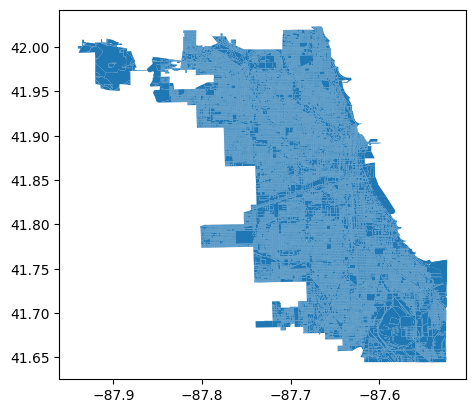

In [7]:
#import geopandas as gpd
#from shapely import wkt

#censusblock_gpd = gpd.GeoDataFrame(censusblock, geometry='geometry')
censusblock.plot()

In [11]:
censusblock = censusblock[['GEOID10', 'geometry']]
censusblock

,GEOID10,geometry
0,170316903002010,"MULTIPOLYGON (((-87.62907 41.76909, -87.62905 ..."
1,170316809003007,"MULTIPOLYGON (((-87.63412 41.77447, -87.63410 ..."
2,170316809003013,"MULTIPOLYGON (((-87.63485 41.77263, -87.63522 ..."
3,170312909004019,"MULTIPOLYGON (((-87.73841 41.85913, -87.73842 ..."
4,170312925004016,"MULTIPOLYGON (((-87.73217 41.85476, -87.73226 ..."
...,...,...
46352,170312203001028,"MULTIPOLYGON (((-87.69323 41.92767, -87.69385 ..."
46353,170312203001030,"MULTIPOLYGON (((-87.69320 41.92667, -87.69351 ..."
46354,170318310002014,"MULTIPOLYGON (((-87.67759 41.91624, -87.67759 ..."
46355,170318310002001,"MULTIPOLYGON (((-87.67398 41.91783, -87.67397 ..."


In [12]:
deviceid.geoid10.dtypes

dtype('int64')

In [13]:
censusblock['GEOID10'] = censusblock.GEOID10.astype('int64')
censusblock['GEOID10'].dtypes

dtype('int64')

In [14]:
idcensusblock = pd.merge(deviceid, censusblock, left_on='geoid10', right_on='GEOID10', how='left')
idcensusblock = idcensusblock.drop(['Unnamed: 0', 'GEOID10'], axis=1)
idcensusblock

,device_id,geoid10,geometry
0,e01c,170313501001010,"MULTIPOLYGON (((-87.61715 41.84000, -87.61716 ..."
1,40d7,170317402002002,"MULTIPOLYGON (((-87.71329 41.69868, -87.71353 ..."
2,05f0,170318398002014,"MULTIPOLYGON (((-87.64071 41.83447, -87.64108 ..."
3,98ab,170311403011000,"MULTIPOLYGON (((-87.71827 41.96880, -87.71888 ..."
4,1185,170310204002009,"MULTIPOLYGON (((-87.68266 42.00893, -87.68257 ..."
...,...,...,...
93,71c4,170318309002016,"MULTIPOLYGON (((-87.68829 41.92672, -87.68812 ..."
94,a3d5,170312211001016,"MULTIPOLYGON (((-87.70906 41.92161, -87.70940 ..."
95,0b6f,170312206011003,"MULTIPOLYGON (((-87.71018 41.92651, -87.71014 ..."
96,4a4d,170312206012001,"MULTIPOLYGON (((-87.71521 41.92644, -87.71551 ..."


<Axes: >

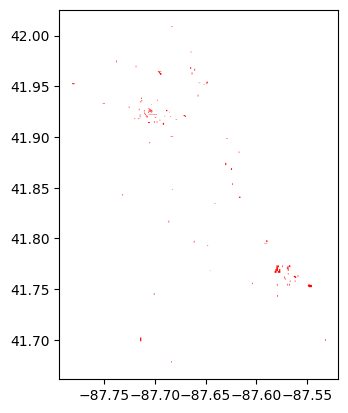

In [15]:
idcensusblock_gpd = gpd.GeoDataFrame(idcensusblock, geometry='geometry')
idcensusblock_gpd.plot(color = 'red')

<Axes: >

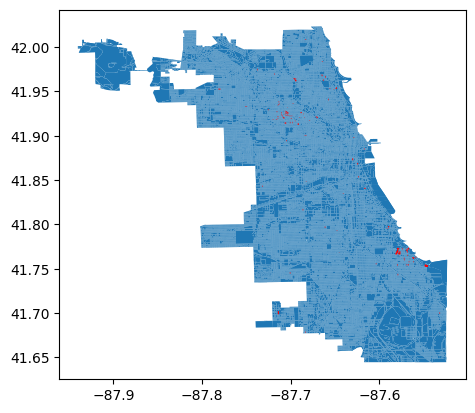

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
censusblock.plot(ax=ax)
idcensusblock_gpd.plot(ax=ax, color='red')